### Importing and Understanding Data

In [839]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [840]:
bike_df= pd.read_csv("https://mayur-pardeshi-aws.s3.ap-south-1.amazonaws.com/day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [841]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [842]:
#test if there are any null value
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [843]:
bike_df['dteday'] =  pd.to_datetime(bike_df['dteday'],format='%d-%m-%Y')
bike_df['dteday'].dtype

dtype('<M8[ns]')

In [844]:
#convert the dteday to yea month and day
bike_df['year'] = pd.DatetimeIndex(bike_df['dteday']).year
bike_df['month'] = pd.DatetimeIndex(bike_df['dteday']).month
# bike_df['day'] = pd.DatetimeIndex(bike_df['dteday']).day  #Should not create it because we already have weekday
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [845]:
# dropped incorrect year and month
bike_df.drop(['mnth','yr'],axis=1,inplace=True)


In [846]:
# drop column which is not more required
bike_df.drop(['holiday','instant'],axis=1,inplace=True)

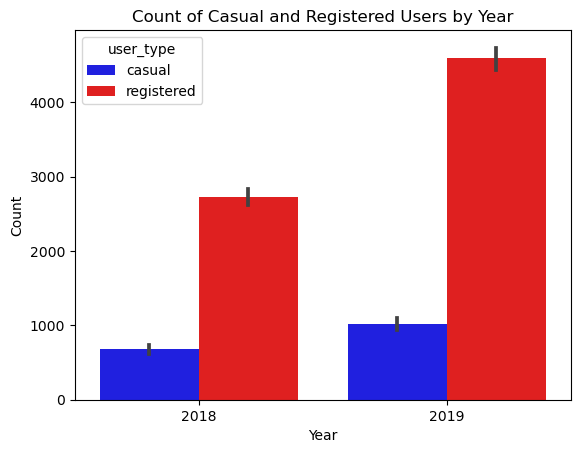

In [847]:
df_filtered = bike_df[['year', 'casual', 'registered']]

# Melt the DataFrame to long format for Seaborn
df_melted = df_filtered.melt(id_vars='year', var_name='user_type', value_name='count')

# Create the grouped bar plot using Seaborn
sns.barplot(x='year', y='count', hue='user_type', data=df_melted, palette=['blue', 'red'])

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Casual and Registered Users by Year')

# Show the plot
plt.show()


#The count of casual and registered users was higher in 2019 compared to 2018, and registered users outnumbered casual users in both years.

In [848]:
bike_df.drop(['dteday','casual','registered'],axis=1,inplace=True)

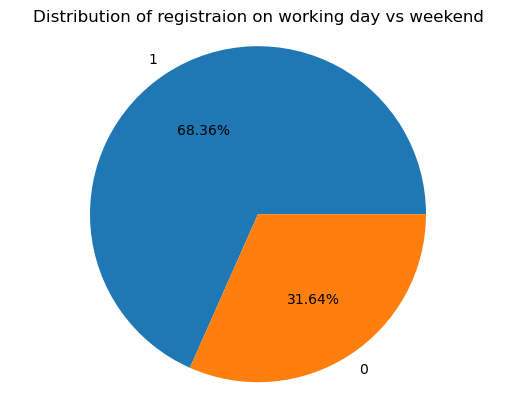

In [849]:
plt.pie(bike_df.workingday.value_counts().values,labels=bike_df.workingday.value_counts().index, autopct='%.2f%%')

plt.axis('equal')

plt.title('Distribution of registraion on working day vs weekend')

plt.show()

#Registration is done mostly on weekdays 

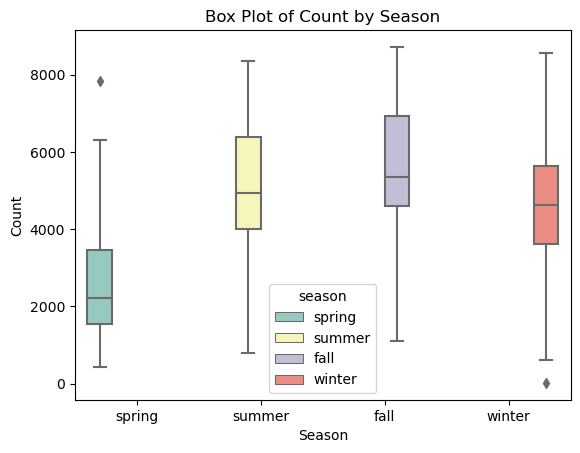

In [850]:
# Mapping codes to season names
codes = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
bike_df['season'] = bike_df['season'].map(codes)

bike_df['cnt'].fillna(bike_df['cnt'].mean(), inplace=True)

# Convert 'count' column to numeric data type (if not already)
bike_df['cnt'] = pd.to_numeric(bike_df['cnt'])
# Create a box plot with hue='count' to separate zero and non-zero values
sns.boxplot(x='season', y='cnt', hue='season', data=bike_df, palette='Set3')
# Set plot labels and 
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Box Plot of Count by Season')

# Show the plot
plt.show()


#Number of registrations are more in fall summer

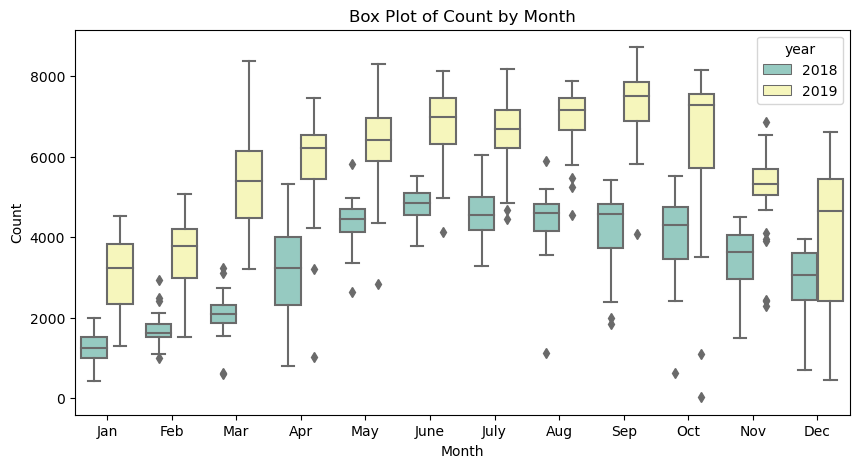

In [851]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
# Mapping codes to month names

bike_df['month'] = bike_df['month'].map(codes)

bike_df['cnt'].fillna(bike_df['cnt'].mean(), inplace=True)
plt.figure(figsize=(10,5))
# Convert 'count' column to numeric data type (if not already)
bike_df['cnt'] = pd.to_numeric(bike_df['cnt'])
# Create a box plot with hue='count' to separate zero and non-zero values
sns.boxplot(x='month', y='cnt', hue='year', data=bike_df, palette='Set3')
# Set plot labels and 
# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Box Plot of Count by Month')

# Show the plot
plt.show()

#The number of bike registrations was higher in September 2019 compared to other months that year, whereas in 2018, June witnessed the highest number of bike registrations.

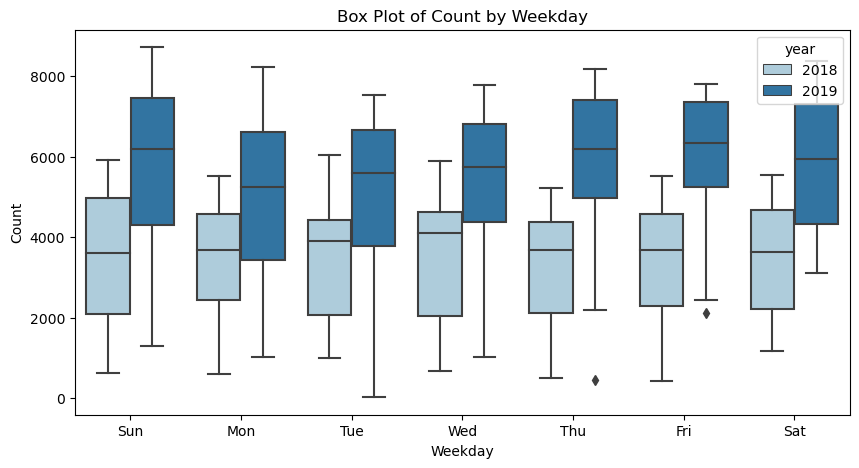

In [852]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
# Mapping codes to weeks

bike_df['weekday'] = bike_df['weekday'].map(codes)

bike_df['cnt'].fillna(bike_df['cnt'].mean(), inplace=True)
plt.figure(figsize=(10,5))
# Convert 'count' column to numeric data type (if not already)
bike_df['cnt'] = pd.to_numeric(bike_df['cnt'])
# Create a box plot with hue='count' to separate zero and non-zero values
sns.boxplot(x='weekday', y='cnt', hue='year', data=bike_df, palette='Paired')
# Set plot labels and 
# Set plot labels and title
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Box Plot of Count by Weekday')

# Show the plot
plt.show()

#The number of bike registrations on mon, tue and wed is low

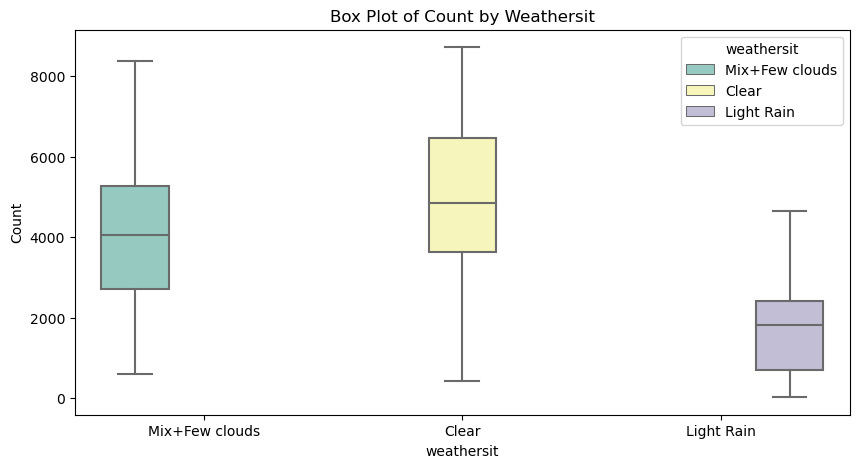

In [853]:
codes = {1:'Clear', 2:'Mix+Few clouds',3:'Light Rain',4:'Heavy Rain'}# Mapping codes to weeks

bike_df['weathersit'] = bike_df['weathersit'].map(codes)

bike_df['cnt'].fillna(bike_df['cnt'].mean(), inplace=True)
plt.figure(figsize=(10,5))
# Convert 'count' column to numeric data type (if not already)
bike_df['cnt'] = pd.to_numeric(bike_df['cnt'])
# Create a box plot with hue='count' to separate zero and non-zero values
sns.boxplot(x='weathersit', y='cnt', hue='weathersit', data=bike_df, palette='Set3')
# Set plot labels and 
# Set plot labels and title
plt.xlabel('weathersit')
plt.ylabel('Count')
plt.title('Box Plot of Count by Weathersit')

# Show the plot
plt.show()


#When there is Clear, Few clouds, Partly cloudy, Partly cloudy then there are many bike registrations done

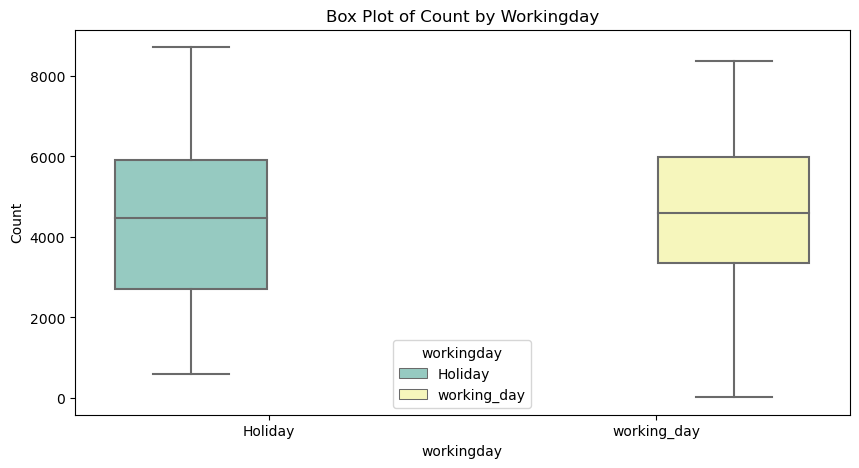

In [854]:
codes = {1:'working_day',0:'Holiday'}
bike_df['workingday'] = bike_df['workingday'].map(codes)

bike_df['cnt'].fillna(bike_df['cnt'].mean(), inplace=True)
plt.figure(figsize=(10,5))
# Convert 'count' column to numeric data type (if not already)
bike_df['cnt'] = pd.to_numeric(bike_df['cnt'])
# Create a box plot with hue='count' to separate zero and non-zero values
sns.boxplot(x='workingday', y='cnt', hue='workingday', data=bike_df, palette='Set3')
# Set plot labels and 
# Set plot labels and title
plt.xlabel('workingday')
plt.ylabel('Count')
plt.title('Box Plot of Count by Workingday')

# Show the plot
plt.show()

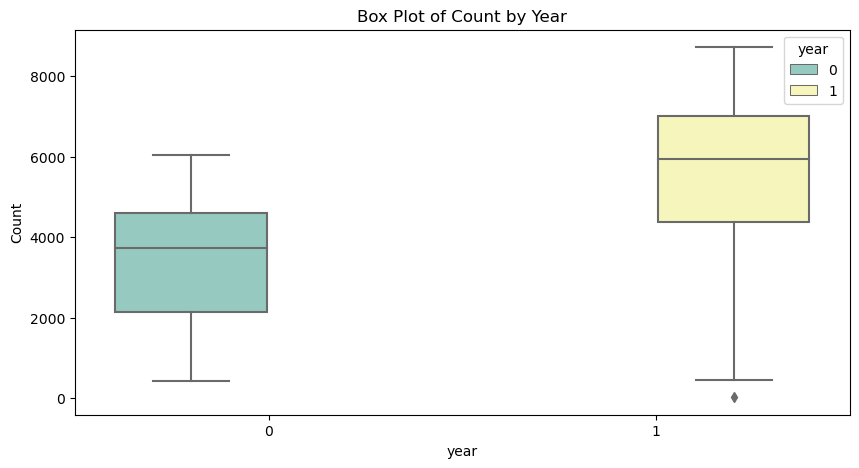

In [855]:
codes = {2019:1,2018:0}
bike_df['year'] = bike_df['year'].map(codes)

bike_df['cnt'].fillna(bike_df['cnt'].mean(), inplace=True)
plt.figure(figsize=(10,5))
# Convert 'count' column to numeric data type (if not already)
bike_df['cnt'] = pd.to_numeric(bike_df['cnt'])
# Create a box plot with hue='count' to separate zero and non-zero values
sns.boxplot(x='year', y='cnt', hue='year', data=bike_df, palette='Set3')
# Set plot labels and 
# Set plot labels and title
plt.xlabel('year')
plt.ylabel('Count')
plt.title('Box Plot of Count by Year')

# Show the plot
plt.show()

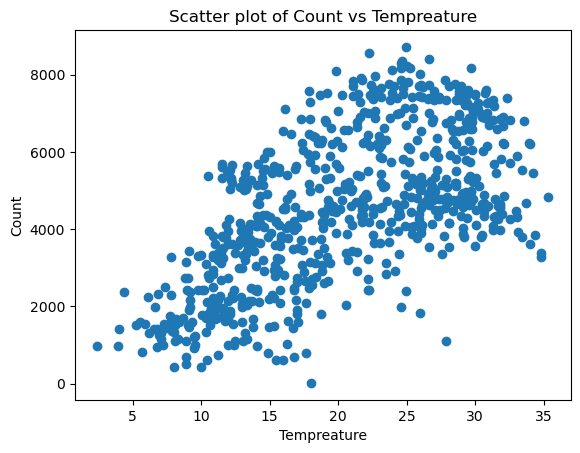

In [856]:
plt.scatter('temp','cnt',data=bike_df)
plt.xlabel('Tempreature')
plt.ylabel('Count')
plt.title('Scatter plot of Count vs Tempreature')
plt.show()
#During high tempreature, bike rentals are observed to increase.

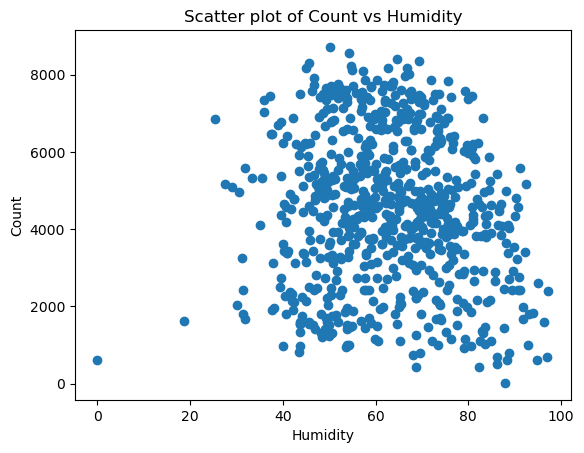

In [857]:
plt.scatter('hum','cnt',data=bike_df)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Scatter plot of Count vs Humidity')
plt.show()

#During periods of high humidity, bike rentals are observed to increase.

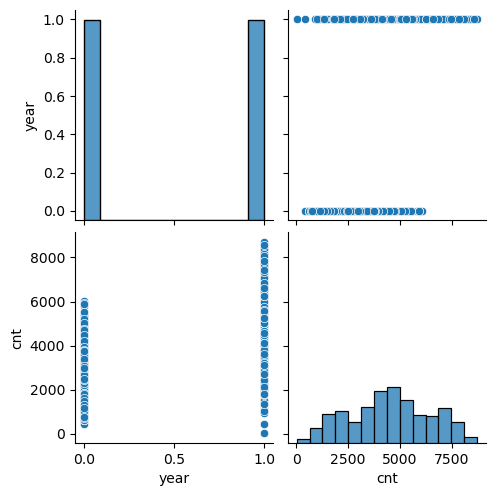

In [858]:
bike_df2 = bike_df[['season', 'weekday','workingday', 'year','month', 'cnt',]]
sns.pairplot(bike_df2)

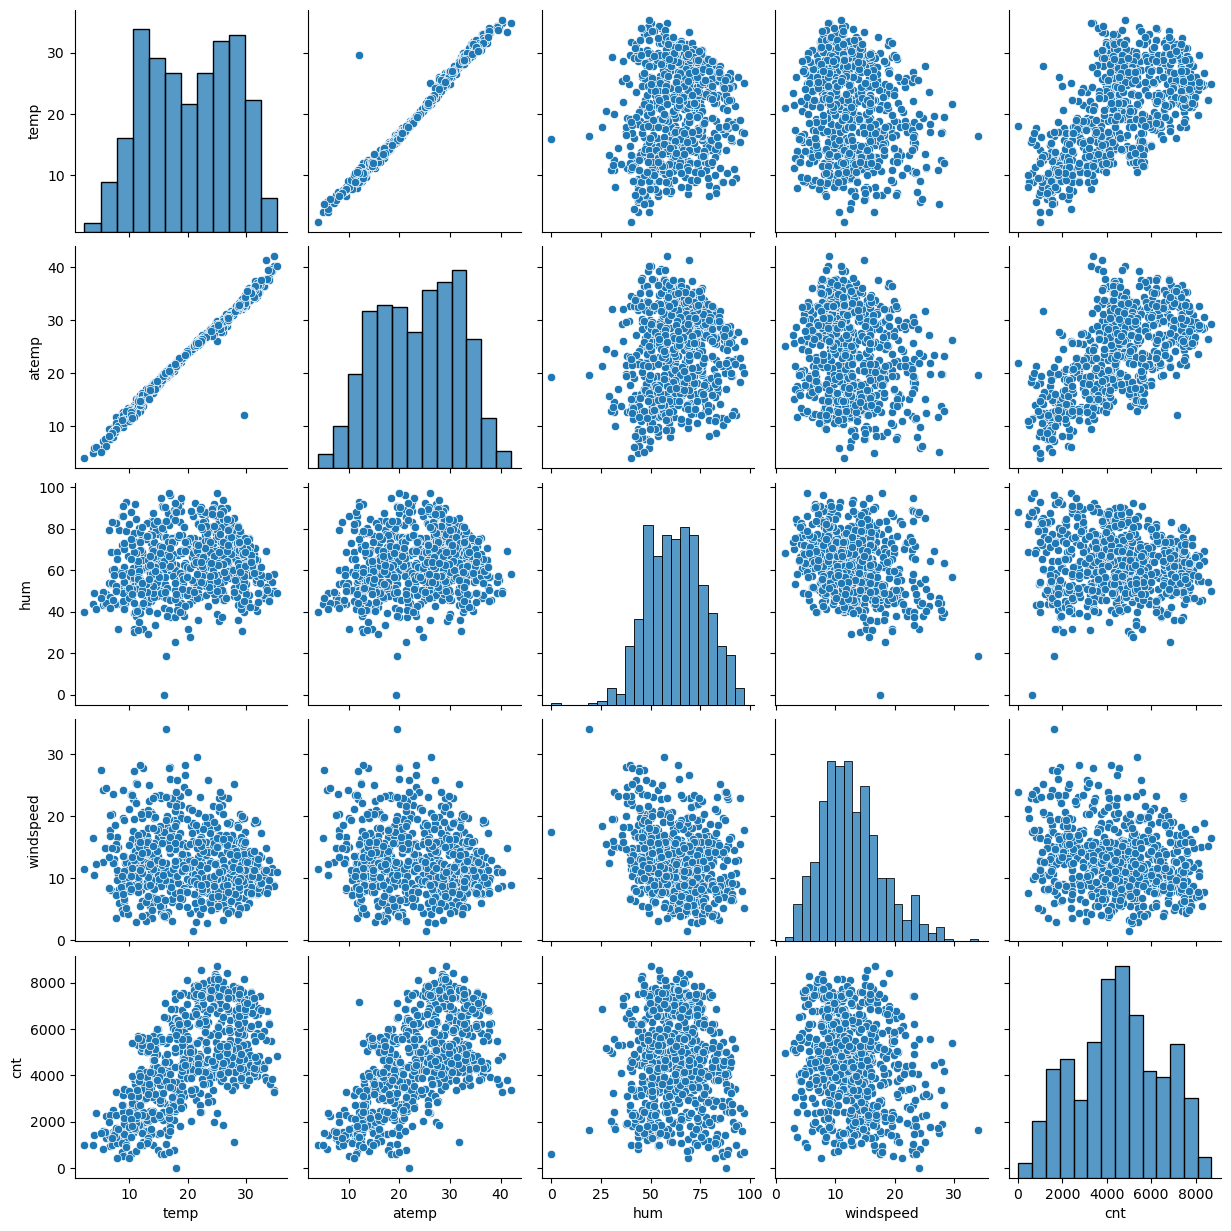

In [859]:
bike_df1 = bike_df[[ 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt',]]
sns.pairplot(bike_df1)

In [860]:
bike_df.columns

Index(['season', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'year', 'month'],
      dtype='object')

<Axes: >

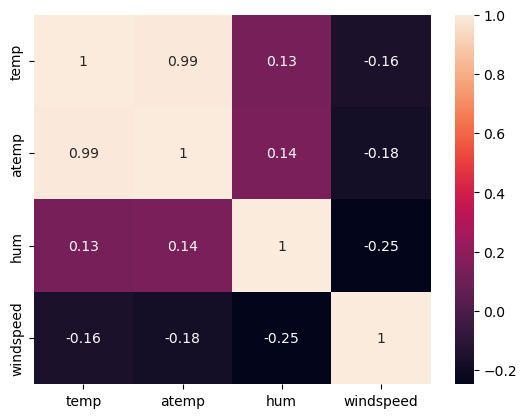

In [861]:
data= bike_df[['temp','atemp','hum','windspeed']]
sns.heatmap(data.corr(),annot=True)



In [862]:
#It has been noticed that the variables "atemp" and "temp" exhibit a strong correlation with each other. As a result, one of these variables can be omitted from the analysis to mitigate the issue of multicollinearity.
bike_df.drop('atemp',axis=1,inplace=True)


In [863]:
bike_df.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month
0,spring,Sun,Holiday,Mix+Few clouds,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Mon,Holiday,Mix+Few clouds,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


In [864]:
seasons = pd.get_dummies(bike_df['season'],drop_first=True)

working_day = pd.get_dummies(bike_df['workingday'],drop_first=True)

weather= pd.get_dummies(bike_df['weathersit'],drop_first=True)

month= pd.get_dummies(bike_df['month'],drop_first=True)

week_day= pd.get_dummies(bike_df['weekday'],drop_first=True)

In [865]:
#c
bike_df= pd.concat([bike_df,seasons,working_day,weather,month,week_day],axis=1)
bike_df.head()

,season,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Sun,Holiday,Mix+Few clouds,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,1,0,0,0
1,spring,Mon,Holiday,Mix+Few clouds,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,1,0,0,0,0,0
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,0,1,0
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,1
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,0,0,1,0,0


In [866]:
#does not need of these columns
bike_df.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

## Splitting the Data into Training and Testing Sets

In [867]:
#train_test split

np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [868]:
# scaler = MinMaxScaler()

scaler= StandardScaler()

df_train.columns = df_train.columns.astype(str)
num_vars=['windspeed','cnt','temp','hum']

# Apply scaler() to all the columns except the 'dummy' variables
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])


In [869]:
df_train.head()

,temp,hum,windspeed,cnt,year,spring,summer,winter,working_day,Light Rain,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,-0.121335,-0.514725,-0.117752,1.562685,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
576,1.231731,0.516433,-0.330615,1.399629,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
426,-0.420478,-0.069854,-0.385694,-0.215554,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,-1.294913,-1.045032,2.018143,-1.379511,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,-0.627580,-1.000840,-0.779889,-0.136589,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [870]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            510 non-null    float64
 1   hum             510 non-null    float64
 2   windspeed       510 non-null    float64
 3   cnt             510 non-null    float64
 4   year            510 non-null    int64  
 5   spring          510 non-null    uint8  
 6   summer          510 non-null    uint8  
 7   winter          510 non-null    uint8  
 8   working_day     510 non-null    uint8  
 9   Light Rain      510 non-null    uint8  
 10  Mix+Few clouds  510 non-null    uint8  
 11  Aug             510 non-null    uint8  
 12  Dec             510 non-null    uint8  
 13  Feb             510 non-null    uint8  
 14  Jan             510 non-null    uint8  
 15  July            510 non-null    uint8  
 16  June            510 non-null    uint8  
 17  Mar             510 non-null    ui

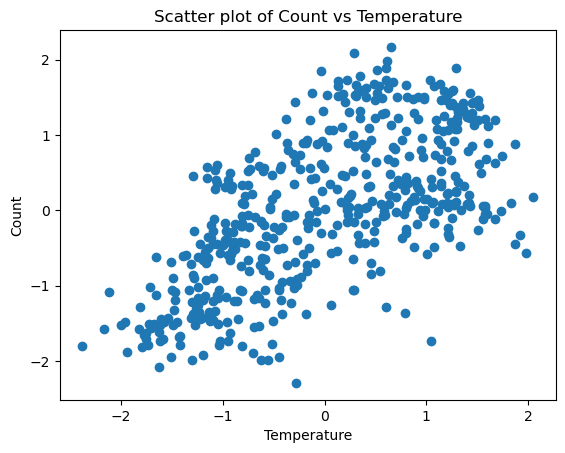

In [871]:
plt.scatter('temp','cnt',data=df_train)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Scatter plot of Count vs Temperature')
plt.show()

### Dividing into X and Y sets for the model building

In [872]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building a linear model

In [873]:
# Using RFE and  LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,step = 10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [874]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', False, 3),
 ('windspeed', False, 2),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('working_day', True, 1),
 ('Light Rain', True, 1),
 ('Mix+Few clouds', True, 1),
 ('Aug', False, 3),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 2),
 ('June', False, 3),
 ('Mar', False, 3),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 3),
 ('Sun', True, 1),
 ('Thu', False, 3),
 ('Tue', False, 3),
 ('Wed', False, 3)]

In [875]:

col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'winter', 'working_day', 'Light Rain',
       'Mix+Few clouds', 'Dec', 'Jan', 'Nov', 'Sep', 'Mon', 'Sun'],
      dtype='object')

In [876]:
X_train.columns[~rfe.support_]

Index(['hum', 'windspeed', 'summer', 'Aug', 'Feb', 'July', 'June', 'Mar',
       'May', 'Oct', 'Sat', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [877]:
# X_test dataframe with RFE  variables
X_train_rfe = X_train[col]

In [878]:
import statsmodels.api as sm
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [879]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.2
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          2.80e-180
Time:                        23:17:26   Log-Likelihood:                -274.18
No. Observations:                 510   AIC:                             576.4
Df Residuals:                     496   BIC:                             635.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.7049      0.126     -5.611      0.000      -0.952      -0.458
temp               0.3934      0.031     12.750      0.000       0.333       0.454
year               1.0457      0.038     27.832      0.000       0.972       1.119
spring            -0.4890      0.072     -6.831      0.000      -0.630      -0.348
winter             0.3501      0.065      5.410      0.000       0.223       0.477
working_day        0.4383      0.121      3.635      0.000       0.201       0.675
Light Rain        -1.4111      0.113    -12.492      0.000      -1.633      -1.189
Mix+Few clouds    -0.3558      0.040     -8.882      0.000      -0.435      -0.277
Dec               -0.2123      0.080     -2.667      0.008      -0.369      -0.056
Jan               -0.2054      0.082     -2.494      0.013      -0.367      -0.044
Nov               -0.2423      0.086     -2.807      0.005      -0.412      -0.073
Sep                0.3132      0.071      4.418      0.000       0.174       0.453
Mon                0.2182      0.128      1.704      0.089      -0.033       0.470
Sun                0.4723      0.127      3.706      0.000       0.222       0.723
==============================================================================
Omnibus:                       88.714   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.190
Skew:                          -0.803   Prob(JB):                     2.37e-61
Kurtosis:                       6.250   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [880]:
# P value of Mon is more than 0.05 so its insignificant in presence of other variables; can be dropped

X_train_v1= X_train_rfe.drop('Mon',1)
X_train_v1= sm.add_constant(X_train_v1)
lm1 = sm.OLS(y_train,X_train_v1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.6
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          8.21e-181
Time:                        23:17:26   Log-Likelihood:                -275.67
No. Observations:                 510   AIC:                             577.3
Df Residuals:                     497   BIC:                             632.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5161      0.059     -8.709      0.000      -0.632      -0.400
temp               0.3929      0.031     12.709      0.000       0.332       0.454
year               1.0463      0.038     27.798      0.000       0.972       1.120
spring            -0.4947      0.072     -6.904      0.000      -0.636      -0.354
winter             0.3515      0.065      5.422      0.000       0.224       0.479
working_day        0.2522      0.051      4.932      0.000       0.152       0.353
Light Rain        -1.4082      0.113    -12.444      0.000      -1.630      -1.186
Mix+Few clouds    -0.3543      0.040     -8.829      0.000      -0.433      -0.275
Dec               -0.2156      0.080     -2.703      0.007      -0.372      -0.059
Jan               -0.2081      0.082     -2.523      0.012      -0.370      -0.046
Nov               -0.2595      0.086     -3.021      0.003      -0.428      -0.091
Sep                0.3035      0.071      4.286      0.000       0.164       0.443
Sun                0.2863      0.066      4.345      0.000       0.157       0.416
==============================================================================
Omnibus:                       90.846   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.266
Skew:                          -0.820   Prob(JB):                     2.53e-63
Kurtosis:                       6.298   Cond. No.                         9.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [881]:
#dropped the constant variable
X_train_new= X_train_v1.drop('const',axis=1)

In [882]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,spring,2.94
3,winter,2.71
4,working_day,2.67
0,temp,2.42
1,year,1.88
9,Nov,1.81
8,Jan,1.72
7,Dec,1.53
6,Mix+Few clouds,1.52
11,Sun,1.38


### Residual Analysis of the train data


Text(0.5, 0, 'Errors')

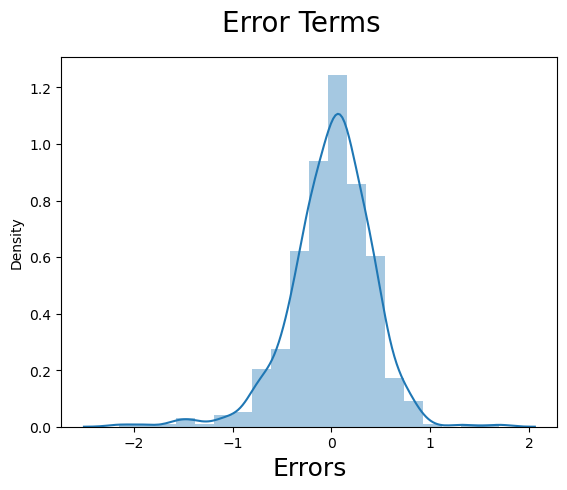

In [883]:
y_train_pred = lm1.predict(X_train_v1)
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### Making Prediction

In [884]:
num_vars=['windspeed','cnt','temp','hum']
df_test[num_vars]= scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [885]:
y_test = df_test.pop('cnt')
X_test = df_test

In [886]:

# Test only on those column which are present in X_train
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [887]:
# Making predictions
y_test_pred = lm1.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'Predictions')

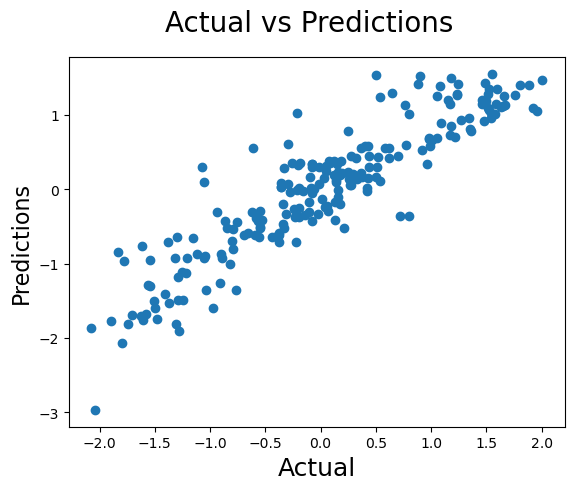

In [888]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              
plt.xlabel('Actual', fontsize=18)                          
plt.ylabel('Predictions', fontsize=16)                         

In [889]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8235319994157413